In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [3]:
import sklearn.preprocessing

data = pd.read_csv("COMP562 - Hot Gurls - Sheet1.csv")

encoder = sklearn.preprocessing.LabelEncoder()

data['Gender_Encoded'] = encoder.fit_transform(data['Gender'])
data['Occupation_Encoded'] = encoder.fit_transform(data['Occupation'])

data.drop('Occupation', axis=1, inplace=True)
data.drop('Gender', axis=1, inplace=True)
data.drop('Wing Totals', axis=1, inplace=True)


cols = list(data.columns)
cols.insert(6, cols.pop(cols.index('Dab')))

data = data[cols]

print("Dataset Shape: ", data.shape)
print("Dataset: ", data.head())

Dataset Shape:  (180, 6)
Dataset:             Celebrity  Season  Current Net Worth  Gender_Encoded  \
0          Tony Yayo       1            4000000               1   
1      Anthony Rizzo       1           27000000               1   
2  Machine Gun Kelly       1           25000000               1   
3            Gunplay       1             400000               1   
4            Ja Rule       1            4000000               1   

   Occupation_Encoded  Dab  
0                  12   No  
1                   3  Yes  
2                  12  Yes  
3                  12  Yes  
4                  12  Yes  


In [4]:
import sklearn.model_selection

features = data.values[:, 2:4]
target = data.values[:, 5]

features_train, features_test, target_train, target_test = sklearn.model_selection.train_test_split(features, target, test_size=0.3, random_state=100)

In [5]:
import sklearn.tree


tree = sklearn.tree.DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=4, min_samples_leaf=6)
 
tree.fit(features_train, target_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, random_state=100)

In [6]:
import sklearn.metrics


target_prediction = tree.predict(features_test)

print("Confusion Matrix: ", sklearn.metrics.confusion_matrix(target_test, target_prediction))
print("Accuracy : ", sklearn.metrics.accuracy_score(target_test, target_prediction)*100)
print("Report : ", sklearn.metrics.classification_report(target_test, target_prediction))

Confusion Matrix:  [[ 0  9]
 [ 0 45]]
Accuracy :  83.33333333333334
Report :                precision    recall  f1-score   support

          No       0.00      0.00      0.00         9
         Yes       0.83      1.00      0.91        45

    accuracy                           0.83        54
   macro avg       0.42      0.50      0.45        54
weighted avg       0.69      0.83      0.76        54



C:\Users\elica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\elica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\elica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

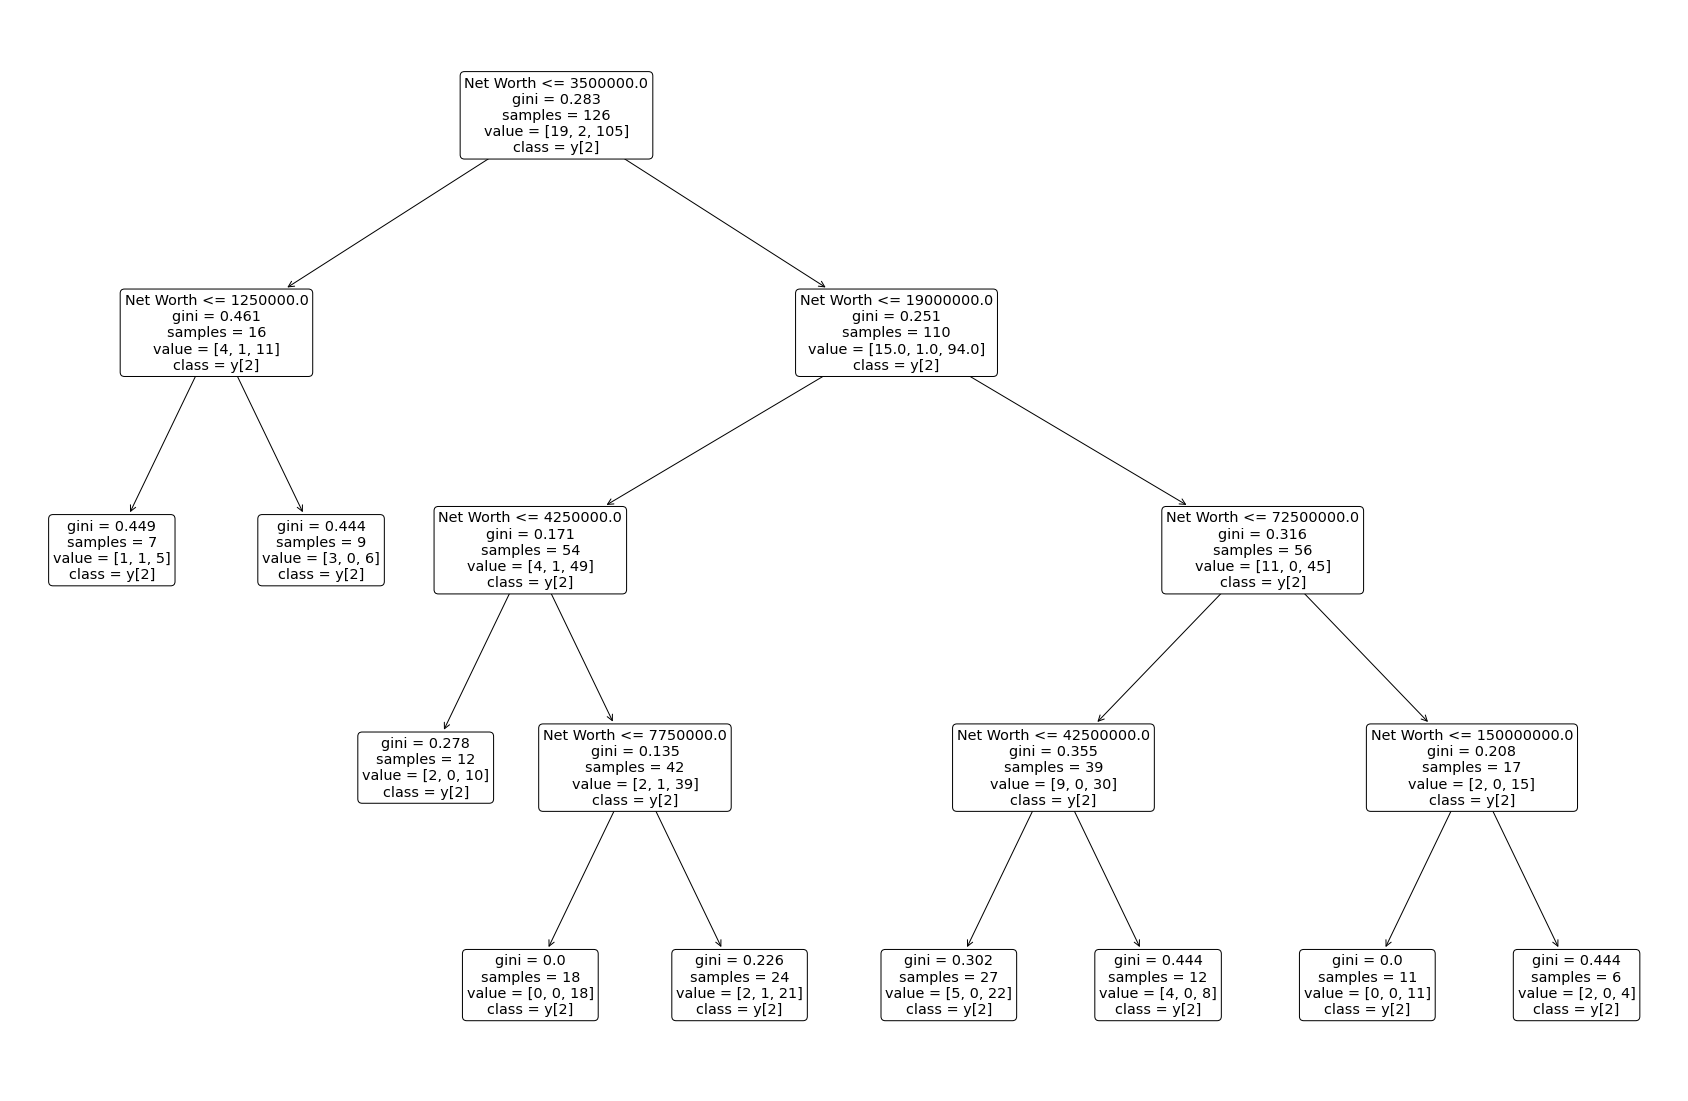

In [7]:
import sklearn.tree


plt.figure(figsize=(30, 20))
sklearn.tree.plot_tree(tree, feature_names=['Net Worth', 'Wing Totals', 'Gender', 'Occupation'], class_names=True, rounded=True)
plt.show()